In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import train_test_split

In [35]:
df=pd.read_csv('data1.csv')

In [36]:
df.describe()

,arr_delay,cancelled,distance,month,month_day,week_day,dep_hour,arr_hour
count,1.561574e+07,1.592748e+07,1.592748e+07,1.592748e+07,1.592748e+07,1.592748e+07,1.592492e+07,1.587855e+07
mean,5.475932e+00,1.690210e-02,7.679726e+02,6.576734e+00,1.575697e+01,2.936918e+00,1.304778e+01,1.466493e+01
std,4.987401e+01,1.289047e-01,5.858934e+02,3.396287e+00,8.764780e+00,1.995794e+00,4.850361e+00,4.982961e+00
min,-1.290000e+03,0.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,-1.500000e+01,0.000000e+00,3.380000e+02,4.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,1.100000e+01
50%,-6.000000e+00,0.000000e+00,6.030000e+02,7.000000e+00,1.600000e+01,3.000000e+00,1.300000e+01,1.500000e+01
75%,8.000000e+00,0.000000e+00,1.005000e+03,1.000000e+01,2.300000e+01,5.000000e+00,1.700000e+01,1.900000e+01
max,2.973000e+03,1.000000e+00,5.095000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01,2.300000e+01


In [37]:
print(df.columns)

Index(['fl_date', 'mkt_unique_carrier', 'tail_num', 'origin', 'dest',
       'arr_delay', 'cancelled', 'distance', 'month', 'month_day', 'week_day',
       'dep_hour', 'arr_hour'],
      dtype='object')


In [38]:
df.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
tail_num               49269
origin                     0
dest                       0
arr_delay             311744
cancelled                  0
distance                   0
month                      0
month_day                  0
week_day                   0
dep_hour                2568
arr_hour               48937
dtype: int64

In [39]:
df=df.dropna(subset=['tail_num'])

In [40]:
df['cancelled'].unique()

array([0, 1], dtype=int64)

In [41]:
df_cancelled = df[df['cancelled']==1]
df_non_cancelled=df[df['cancelled']==0]


In [42]:
# # Shuffle the data in the DataFrame and create a sample with half the size
sample_size = len(df_cancelled)//2
df_cancelled = df_cancelled.sample(n=sample_size, random_state=42)
df_non_cancelled= df_non_cancelled.sample(n=sample_size, random_state=42)
df= pd.concat([df_cancelled,df_non_cancelled])
# # Reset the index of the shuffled sample
df.reset_index(drop=True, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219938 entries, 0 to 219937
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             219938 non-null  object 
 1   mkt_unique_carrier  219938 non-null  object 
 2   tail_num            219938 non-null  object 
 3   origin              219938 non-null  object 
 4   dest                219938 non-null  object 
 5   arr_delay           109648 non-null  float64
 6   cancelled           219938 non-null  int64  
 7   distance            219938 non-null  int64  
 8   month               219938 non-null  int64  
 9   month_day           219938 non-null  int64  
 10  week_day            219938 non-null  int64  
 11  dep_hour            219914 non-null  float64
 12  arr_hour            219143 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 21.8+ MB


In [30]:
df['cancelled'].unique()

array([1, 0], dtype=int64)

In [45]:
df=df.fillna(0)

In [46]:
df.head()

,fl_date,mkt_unique_carrier,tail_num,origin,dest,arr_delay,cancelled,distance,month,month_day,week_day,dep_hour,arr_hour
0,2019-02-17,WN,N494WN,OAK,BUR,0.0,1,325,2,17,6,15.0,16.0
1,2019-04-11,WN,N415WN,MSP,OAK,0.0,1,1578,4,11,3,12.0,14.0
2,2019-02-11,AA,N841NN,SEA,DFW,0.0,1,1660,2,11,0,15.0,21.0
3,2018-06-19,WN,N924WN,BUR,OAK,0.0,1,325,6,19,1,11.0,12.0
4,2018-07-24,WN,N416WN,DCA,CMH,0.0,1,323,7,24,1,19.0,21.0


In [47]:
df['origin-dest']=df['origin']+'-'+df['dest']
x= df.groupby('origin-dest')['cancelled'].mean()
df['origin-dest-mean']= (df['origin-dest'].map(x)).round(2)
df=df.drop(['origin','dest'],axis=1)

In [48]:
df['month']=df['month'].astype(str)
df['month_carrier']=df['mkt_unique_carrier']+'-'+df['month']
x= df.groupby('month_carrier')['cancelled'].mean()
df['month_carrier_mean']= (df['month_carrier'].map(x)).round(2)
df=df.drop(['month_carrier','mkt_unique_carrier','month'],axis=1)

In [49]:
df['arr_delay'] = df['arr_delay'].apply(lambda x: 0 if x <= 0 else 1)

In [50]:
df.head()

,fl_date,tail_num,arr_delay,cancelled,distance,month_day,week_day,dep_hour,arr_hour,origin-dest,origin-dest-mean,month_carrier_mean
0,2019-02-17,N494WN,0,1,325,17,6,15.0,16.0,OAK-BUR,0.77,0.68
1,2019-04-11,N415WN,0,1,1578,11,3,12.0,14.0,MSP-OAK,0.43,0.58
2,2019-02-11,N841NN,0,1,1660,11,0,15.0,21.0,SEA-DFW,0.57,0.68
3,2018-06-19,N924WN,0,1,325,19,1,11.0,12.0,BUR-OAK,0.76,0.50
4,2018-07-24,N416WN,0,1,323,24,1,19.0,21.0,DCA-CMH,0.45,0.52


In [51]:
df=df.drop(['fl_date','origin-dest','tail_num','distance'],axis=1)

In [52]:
df.head()

,arr_delay,cancelled,month_day,week_day,dep_hour,arr_hour,origin-dest-mean,month_carrier_mean
0,0,1,17,6,15.0,16.0,0.77,0.68
1,0,1,11,3,12.0,14.0,0.43,0.58
2,0,1,11,0,15.0,21.0,0.57,0.68
3,0,1,19,1,11.0,12.0,0.76,0.50
4,0,1,24,1,19.0,21.0,0.45,0.52


In [53]:
dummies = ['month_day', 'week_day', 'dep_hour','arr_hour'] 

for i in dummies:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i,dtype=float)], axis=1)
    df = df.drop([i], axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219938 entries, 0 to 219937
Data columns (total 90 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   arr_delay           219938 non-null  int64  
 1   cancelled           219938 non-null  int64  
 2   origin-dest-mean    219938 non-null  float64
 3   month_carrier_mean  219938 non-null  float64
 4   month_day_1         219938 non-null  float64
 5   month_day_2         219938 non-null  float64
 6   month_day_3         219938 non-null  float64
 7   month_day_4         219938 non-null  float64
 8   month_day_5         219938 non-null  float64
 9   month_day_6         219938 non-null  float64
 10  month_day_7         219938 non-null  float64
 11  month_day_8         219938 non-null  float64
 12  month_day_9         219938 non-null  float64
 13  month_day_10        219938 non-null  float64
 14  month_day_11        219938 non-null  float64
 15  month_day_12        219938 non-nul

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
# Scale features since weight magnitudes will effect regularization weight penalties
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,arr_delay,cancelled,origin-dest-mean,month_carrier_mean,month_day_1,month_day_2,month_day_3,month_day_4,month_day_5,month_day_6,...,arr_hour_14.0,arr_hour_15.0,arr_hour_16.0,arr_hour_17.0,arr_hour_18.0,arr_hour_19.0,arr_hour_20.0,arr_hour_21.0,arr_hour_22.0,arr_hour_23.0
0,-0.46092,1.0,1.261527,1.145365,-0.173345,-0.204492,-0.187596,-0.167798,-0.165187,-0.171752,...,-0.244779,-0.240471,3.898935,-0.266611,-0.262706,-0.276056,-0.26119,-0.272780,-0.229076,-0.228515
1,-0.46092,1.0,-0.327073,0.507885,-0.173345,-0.204492,-0.187596,-0.167798,-0.165187,-0.171752,...,4.085322,-0.240471,-0.256480,-0.266611,-0.262706,-0.276056,-0.26119,-0.272780,-0.229076,-0.228515
2,-0.46092,1.0,0.327056,1.145365,-0.173345,-0.204492,-0.187596,-0.167798,-0.165187,-0.171752,...,-0.244779,-0.240471,-0.256480,-0.266611,-0.262706,-0.276056,-0.26119,3.665952,-0.229076,-0.228515
3,-0.46092,1.0,1.214803,-0.002098,-0.173345,-0.204492,-0.187596,-0.167798,-0.165187,-0.171752,...,-0.244779,-0.240471,-0.256480,-0.266611,-0.262706,-0.276056,-0.26119,-0.272780,-0.229076,-0.228515
4,-0.46092,1.0,-0.233626,0.125397,-0.173345,-0.204492,-0.187596,-0.167798,-0.165187,-0.171752,...,-0.244779,-0.240471,-0.256480,-0.266611,-0.262706,-0.276056,-0.26119,3.665952,-0.229076,-0.228515


Predicting cancellation

In [57]:
from sklearn.utils import shuffle
X, y = df.drop(['arr_delay','cancelled'],axis=1), df['cancelled']

X, y = shuffle(X, y, random_state=27)

Confusion Matrix (Default Threshold):
[[14451  7284]
 [ 5641 16612]]
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.72      0.66      0.69     21735
           1       0.70      0.75      0.72     22253

    accuracy                           0.71     43988
   macro avg       0.71      0.71      0.71     43988
weighted avg       0.71      0.71      0.71     43988



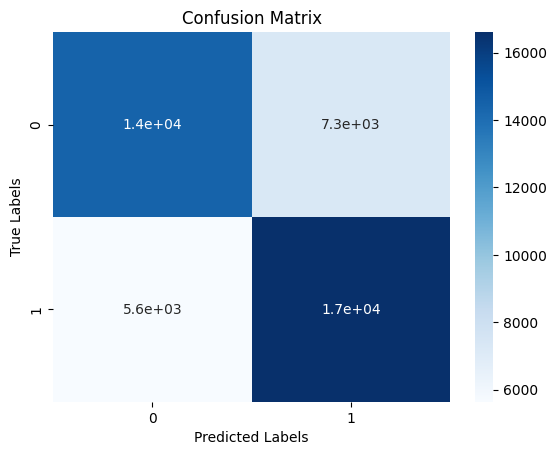

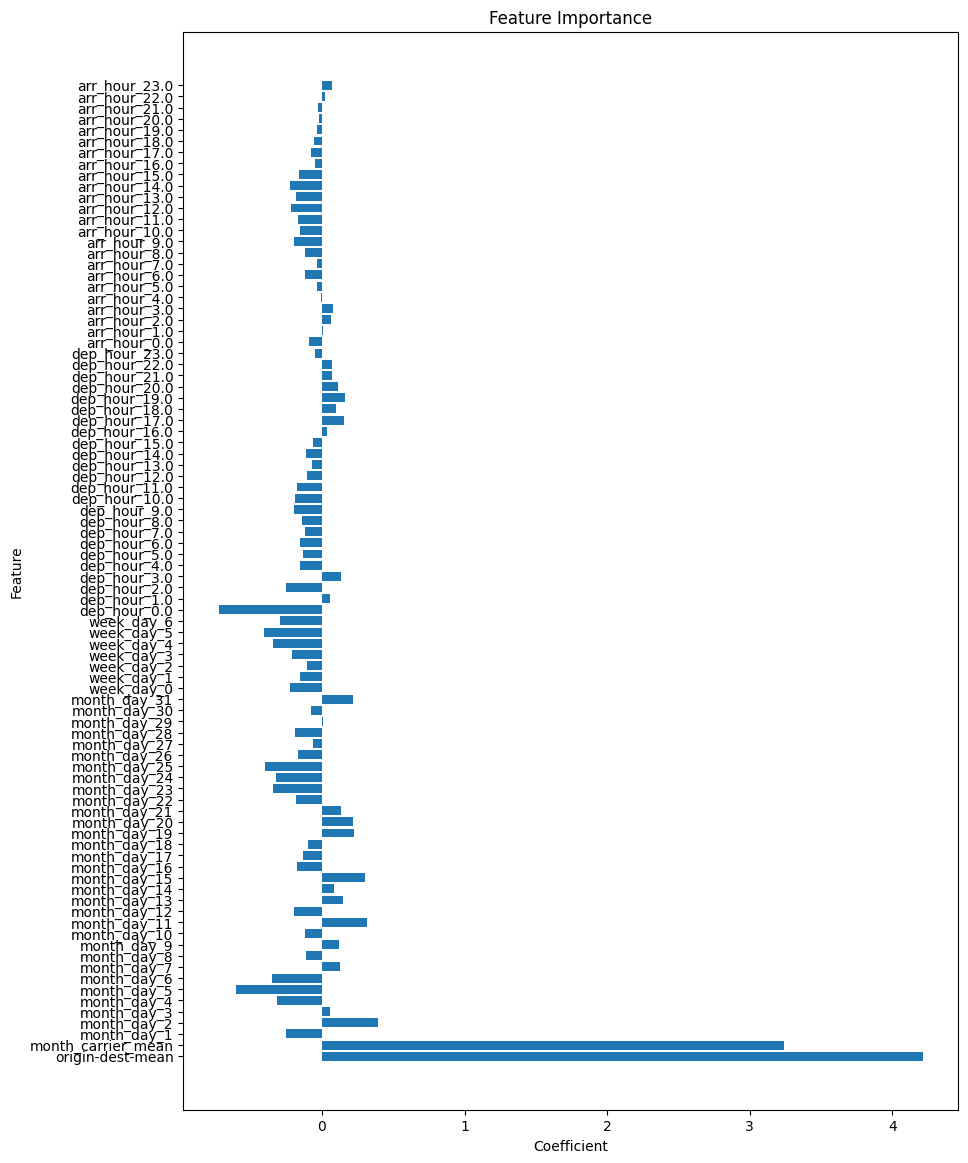

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Gather and prepare your data
# Assume you have X as your feature matrix and y as your target variable

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the logistic regression model
model = LogisticRegression()

# Step 4: Fit the model
model.fit(X_train, y_train)

# Step 5: Interpret the coefficients (optional)
coefficients = model.coef_
intercept = model.intercept_

# Step 6: Evaluate the model with default threshold (0.5)
y_pred = model.predict(X_test)
print("Confusion Matrix (Default Threshold):")
print(confusion_matrix(y_test, y_pred))
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))



# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#feature importance score
feature_importance = model.coef_
plt.figure(figsize=(10, 14))
plt.barh(X.columns, feature_importance[0])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()